## Deep learning - Portfolio-Exam

### Submitted To : <b> Prof. Dr. Stephan Doerfel </b>

### Submitted By: <b> Mooli Nithin Kumar Reddy  </b>

The dataset images are also included in the zip folder and the augmented images are also present in the folder.

Link for the dataset 

Kaggle : https://www.kaggle.com/datasets/tawsifurrahman/tuberculosis-tb-chest-xray-dataset

# Task 1 – The Data

<div class="alert alert-block alert-info">

Hello, I am an datascientist working for an organization called rainbow where they need a moddl to detect the Tuberculosis.

Tuberculosis (TB) remains a significant global health challenge, caused by the infectious bacterium Mycobacterium tuberculosis. With millions of new cases reported each year, TB primarily attacks the respiratory system, posing a threat to individuals worldwide. 

Symptoms of Tuberculosis: 

Common symptoms of TB: Persistent cough lasting more than three weeks. 

Unintended weight loss. 

Fever, especially in the evening. 

Night sweats. 

Fatigue and weakness 

The goal is to build a deep learning model that can accurately tell whether someone has TB or not, based on their chest X-rays. This model will help doctors diagnose TB more quickly and easily, improving patient care and potentially reducing the number of TB-related deaths by catching the disease earlier

DATASET :
 
This dataset contains CXR images of Normal (3500) and patients with 700 TB images in publicly accessible and 2800 TB images can be downloaded from NIAID TB portal in two folders

</div>

Loading all the libraries which are needed

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset
import datetime
import os
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
from keras import Sequential
from tensorflow.keras.losses import binary_crossentropy
import torch

Storing the datasets of normal and tuberculosis images in variables

In [2]:
labels_dict = {'Normal':0, 'Tuberculosis':1}

In [3]:
normal_images_list = os.listdir(r"C:\Users\nithi\OneDrive\Desktop\Deep Learning\TB_Chest_Radiography_Database")

In [4]:
tuberculosis_images_list = os.listdir(r"C:\Users\nithi\OneDrive\Desktop\Deep Learning\TB_Chest_Radiography_Database")

# Task 2 – IDA


In [5]:
import cv2
import os

# Initialize lists to hold images and labels
normal_images = []
normal_labels = []

# List of image filenames for normal cases
normal_images_list = os.listdir(r"C:\Users\nithi\OneDrive\Desktop\Deep Learning\TB_Chest_Radiography_Database\Normal")

for image_path in normal_images_list:
    
    full_path = os.path.join(r"C:\Users\nithi\OneDrive\Desktop\Deep Learning\TB_Chest_Radiography_Database\Normal", image_path)
    
    # Loading the image
    img = cv2.imread(full_path)
    
    # Checking if the image was loaded correctly
    if img is None:
        print(f"Failed to load image: {full_path}")
        continue  # Skiping to the next image if loading failed
    
    # Converting to grayscale and resize
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (100, 100))
    
    
    normal_images.append(img)
    normal_labels.append(0)  


tuberculosis_images = []
tuberculosis_labels = []


tuberculosis_images_list = os.listdir(r"C:\Users\nithi\OneDrive\Desktop\Deep Learning\TB_Chest_Radiography_Database\Tuberculosis")

for image_path in tuberculosis_images_list:
   
    full_path = os.path.join(r"C:\Users\nithi\OneDrive\Desktop\Deep Learning\TB_Chest_Radiography_Database\Tuberculosis", image_path)
    
    # Loading the image
    img = cv2.imread(full_path)
    
    # Checking if the image was loaded correctly
    if img is None:
        print(f"Failed to load image: {full_path}")
        continue  # Skiping to the next image if loading failed
    
    # Converting to grayscale and resize
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (100, 100))
    
    
    tuberculosis_images.append(img)
    tuberculosis_labels.append(1)  

Checking how many normal and tuberculosis images are present in the data set

Here i also done the resizing and reshaping the images which can be used for the model running.

We do this for both normal and tuberculosis images

In [6]:
len(normal_images),len(tuberculosis_images)

(3486, 700)

# Task 3 – Preprocessing



Here i did augmentation for the tuberculosis images as the normal and tuberculosis are not equal

Image augmentation is commonly used in deep learning to improve the performance and robustness of models, especially when working with images.

The main reasons why augmentation is done because to Increases Dataset Size,Improves Generalization and Reduces Overfitting,Reduces Data Imbalance and Reduces Data Imbalance.

After the augmentation it creates a folder and are stored in the same folder where the normal and tuberculosis images folders are present.

In [7]:
# from keras.preprocessing.image import ImageDataGenerator, img_to_array, save_img


# tuberculosis_folder = "C:\Users\nithi\OneDrive\Desktop\Deep Learning\TB_Chest_Radiography_Database\Tuberculosis"
# augmented_images_dir = 'augmented_images'
# os.makedirs(augmented_images_dir, exist_ok=True)

# datagen = ImageDataGenerator(
#     rotation_range=40,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     fill_mode='nearest'
# )


# gen_tuberculosis_images = os.listdir(tuberculosis_folder)
# num_augmented_images = 2786
# num_generated_images = 0

# # Generate augmented images
# for filename in gen_tuberculosis_images:
#     img_path = os.path.join(tuberculosis_folder, filename)
#     img = cv2.imread(img_path)
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#     img = cv2.resize(img, (100, 100))
#     x = img_to_array(img)
#     x = x.reshape((1,) + x.shape)

# # Generate and save augmented images
#     i = 0
#     for batch in datagen.flow(x, batch_size=1,
#                               save_to_dir=augmented_images_dir, 
#                               save_prefix='augmented', 
#                               save_format='png'):
#         num_generated_images += 1
#         i += 1
#         if i >= num_augmented_images / len(tuberculosis_images):
#             break
#     if num_generated_images >= num_augmented_images:
#         break

# print(f"{num_generated_images} augmented images generated in total.")


Here i wont run the augmentation code again as it is already present in the folder so we use that or else we can run by removing the augmentation folder in the main folderwhere it is stored and run this code.

Resizing and reshaping the Augmentated images .

In [8]:
augmented_images_list=os.listdir(r"C:\Users\nithi\OneDrive\Desktop\Deep Learning\augmented_images")

augmented_images = []
augmented_labels = []

for image_path in augmented_images_list:
    
    img = cv2.imread(str(r"C:\Users\nithi\OneDrive\Desktop\Deep Learning\augmented_images" + '/' + image_path))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img,(100,100))
    
    augmented_images.append(img)
    augmented_labels.append(1)

In [9]:
len(augmented_images)

2440

This is the normal image before preprocessing

Text(0.5, 1.0, 'Normal chest x-ray image')

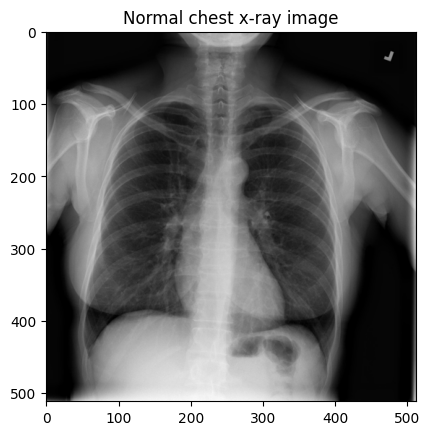

In [10]:
sample1=cv2.imread(r"C:\Users\nithi\OneDrive\Desktop\Deep Learning\TB_Chest_Radiography_Database\Normal\Normal-16.png")
plt.imshow(sample1)
plt.title("Normal chest x-ray image")

This the normal image after preprocessing

Text(0.5, 1.0, 'Normal chest x-ray image after preprocessing')

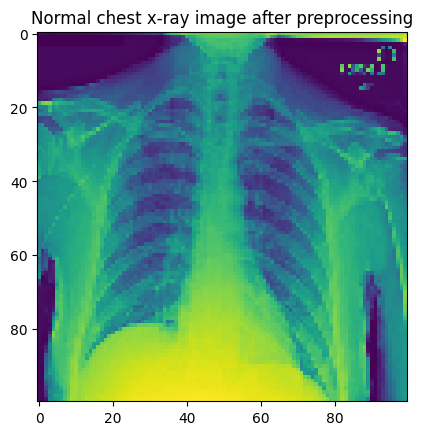

In [11]:
plt.imshow(normal_images[1])
plt.title("Normal chest x-ray image after preprocessing")

This is the tuberculosis image before preprocessing

Text(0.5, 1.0, 'Tuberculosis chest x-ray image')

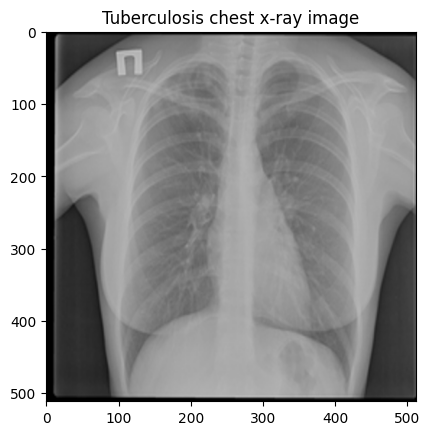

In [12]:
sample2=cv2.imread(r"C:\Users\nithi\OneDrive\Desktop\Deep Learning\TB_Chest_Radiography_Database\Tuberculosis\Tuberculosis-24.png")
plt.imshow(sample2)
plt.title("Tuberculosis chest x-ray image")

This is the tuberculosis image before preprocessing

Text(0.5, 1.0, 'Tuberculosis chest x-ray image after preprocessing')

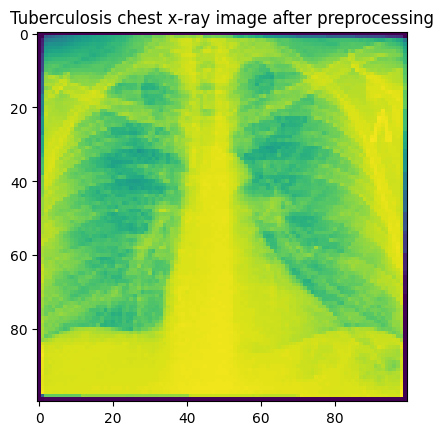

In [13]:
plt.imshow(tuberculosis_images[1])
plt.title("Tuberculosis chest x-ray image after preprocessing")

Adding the augmented images to the tuberculosis images

In [14]:
tuberculosis_images = tuberculosis_images + augmented_images
len(normal_images),len(tuberculosis_images)

(3486, 3140)

Removing some images so that it can equal the both numer of images so that the data set is ready to run the model

In [15]:
normal_images = normal_images[:len(tuberculosis_images)]
len(normal_images),len(tuberculosis_images)

(3140, 3140)

In [16]:
tuberculosis_labels = tuberculosis_labels + augmented_labels
normal_labels = normal_labels[:len(tuberculosis_labels)]

In [17]:
len(normal_labels),len(tuberculosis_labels)

(3140, 3140)

In [18]:
images = normal_images + tuberculosis_images
labels = normal_labels + tuberculosis_labels

In [19]:
images = np.array(images)
labels = np.array(labels)

Creating a random ordering of the image indices, which can be useful when splitting data into training and validation sets, feeding images in a random order for training.

In [20]:
shuffled_indices = np.arange(images.shape[0])
np.random.shuffle(shuffled_indices)

In [21]:
images = images[shuffled_indices]
labels = labels[shuffled_indices]

In [22]:
images.shape

(6280, 100, 100)

In [23]:
labels.shape

(6280,)

In [24]:
np.unique(labels)

array([0, 1])

 Normalizing the pixel values in the images array, which contains image data.
 
 This line normalizes the image data to a 0-1 range, making it ready for running the model.

In [25]:
images = images/255

# Task 4 – EDA

Plotting the number of images present in both datasets after preprocessing

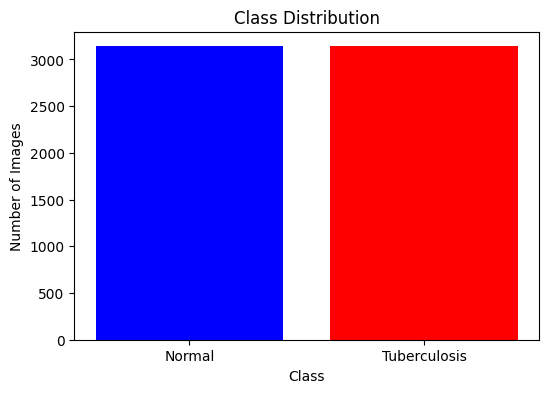

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

normal_count = len(normal_images)
tuberculosis_count = len(tuberculosis_images)


plt.figure(figsize=(6, 4))
plt.bar(['Normal', 'Tuberculosis'], [normal_count, tuberculosis_count], color=['blue', 'red'])
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.show()


Displaying the pixel values of the images and plottin them with histogram

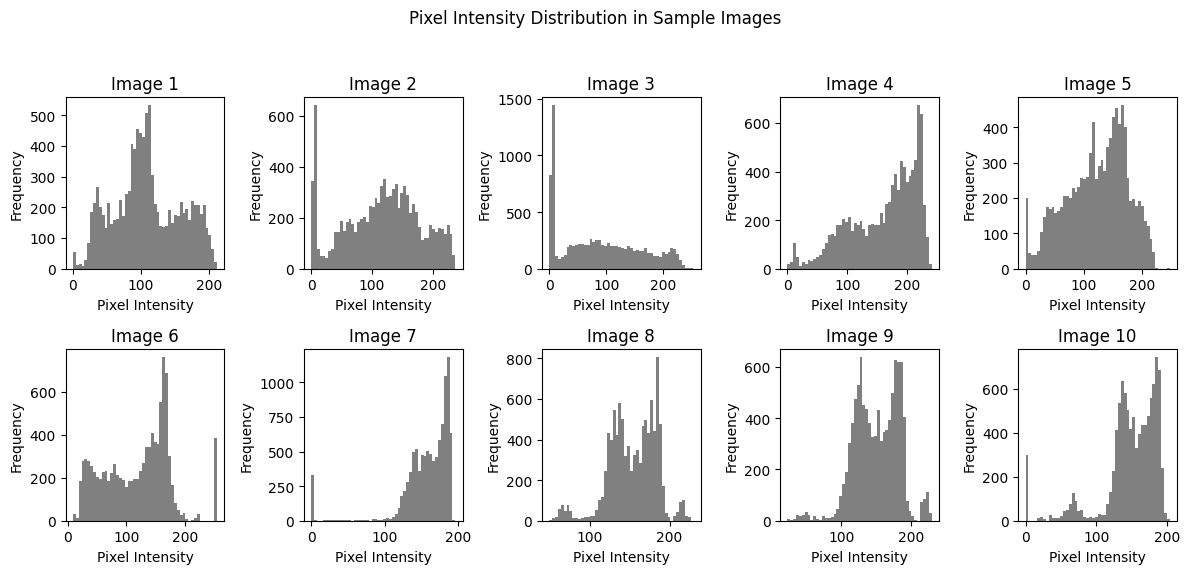

In [27]:
sample_images_fromdataset = normal_images[:5] + tuberculosis_images[:5]
plt.figure(figsize=(12, 6))

for idx, img in enumerate(sample_images_fromdataset):
    plt.subplot(2, 5, idx + 1)
    plt.hist(img.ravel(), bins=50, color='gray')
    plt.title(f"Image {idx + 1}")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")

plt.suptitle("Pixel Intensity Distribution in Sample Images")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Displaying the augmented images 

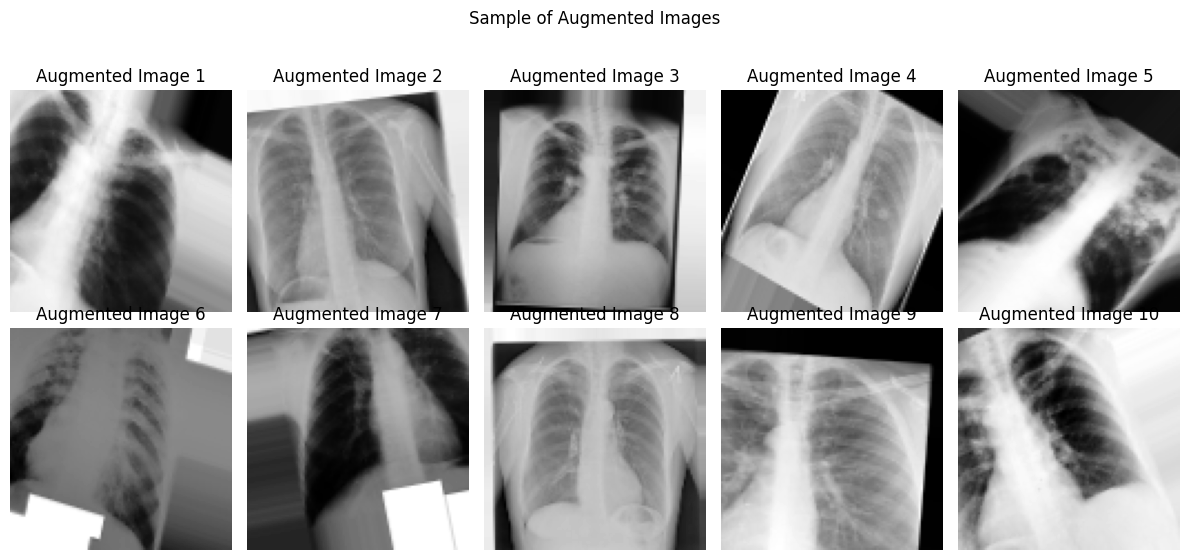

In [28]:
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(augmented_images[i], cmap='gray')
    plt.title(f"Augmented Image {i + 1}")
    plt.axis('off')

plt.suptitle("Sample of Augmented Images")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Task 5 – Baselines

The data here below is splited into training (60%), validation (20%), and test (20%) sets.

In [29]:
X_train, X_temp, y_train, y_temp = train_test_split(images, labels, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
X_train, X_val, X_test = np.expand_dims(X_train, -1), np.expand_dims(X_val, -1), np.expand_dims(X_test, -1)

In [30]:
X_train.shape,X_val.shape,X_test.shape

((3768, 100, 100, 1), (1256, 100, 100, 1), (1256, 100, 100, 1))

Allowing PyTorch to load data in batches and use it efficiently in the training loop.

This code can easily iterate through data during training and validation, an essential structure for training deep learning models in PyTorch.

In [31]:
train_data = TensorDataset(torch.tensor(X_train), torch.tensor(y_train))
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
val_data = TensorDataset(torch.tensor(X_val), torch.tensor(y_val))
val_loader = DataLoader(val_data, batch_size=32)

In [32]:

X_train_flatten = X_train.reshape(X_train.shape[0], -1)
X_test_flatten = X_test.reshape(X_test.shape[0], -1)

Using the Support Vector Machine learning model 

In [33]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

svm_model = make_pipeline(StandardScaler(), SVC(kernel='linear', probability=True))
svm_model.fit(X_train_flatten, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(kernel='linear', probability=True))])

In [34]:
from sklearn.metrics import classification_report

svm_predictions = svm_model.predict(X_test_flatten)
print("SVM Model Classification Report:")
print(classification_report(y_test, svm_predictions))

SVM Model Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       653
           1       0.92      0.90      0.91       603

    accuracy                           0.91      1256
   macro avg       0.91      0.91      0.91      1256
weighted avg       0.91      0.91      0.91      1256



# Task 6 – Deep Learning Experiments

Using CNN model i have trained the dataset.

The dropout layer is a layer used in the construction of neural networks to prevent overfitting.I have used 2 dropout layers for one model and 3 dropout layers for another model.

Using the data loader with batch size of 32 which means each sample will have 32 images and trains the data.

I also used early stopping mechanism because the model after training for some epochs the model wont have any thing to learn and the loss and accuracy are similar for all the epoch so with early stopping mechanism it stops after running some epochs.

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
def create_model(dropout_rate=0.3):
    model = Sequential([
        Conv2D(64, kernel_size=(3,3), padding="same", activation="relu", input_shape=(100, 100, 1)),
        Conv2D(64, kernel_size=(3,3), padding="same", activation="relu"),
        MaxPooling2D((2, 2)),
        
        Conv2D(128, kernel_size=(3,3), padding="same", activation="relu"),
        Conv2D(128, kernel_size=(3,3), padding="same", activation="relu"),
        MaxPooling2D((2, 2)),
        
        Conv2D(256, kernel_size=(3,3), padding="same", activation="relu"),
        Conv2D(256, kernel_size=(3,3), padding="same", activation="relu"),
        Dropout(dropout_rate),
        Flatten(),
        
        Dense(256, activation="relu"),
        Dropout(dropout_rate),
        Dense(1, activation="sigmoid")
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [37]:
def model_with_dropout(dropout_layers=2, dropout_rate=0.3):
    model = Sequential()
    
    model.add(Conv2D(64, kernel_size=(3,3), padding="same", activation="relu", input_shape=(100, 100, 1)))
    model.add(Conv2D(64, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Conv2D(128, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(128, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Conv2D(256, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(256, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Dropout(dropout_rate))  # First dropout layer

    model.add(Flatten())
    model.add(Dense(256, activation="relu"))

    if dropout_layers >= 2:
        model.add(Dropout(dropout_rate))
    if dropout_layers == 3:
        model.add(Dropout(dropout_rate))
    
    model.add(Dense(1, activation="sigmoid"))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    
    return model


In [38]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

In [39]:
dropout_rate = 0.3  # Experiment with this rate to find the optimal value
model = create_model(dropout_rate)
history = model.fit(train_loader, epochs=50, validation_data=val_loader, callbacks=[early_stopping, tensorboard_callback])

C:\Users\nithi\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 149s 1s/step - accuracy: 0.7336 - loss: 0.6145 - val_accuracy: 0.9196 - val_loss: 0.2056
Epoch 2/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 126s 1s/step - accuracy: 0.9439 - loss: 0.1759 - val_accuracy: 0.9658 - val_loss: 0.0989
Epoch 3/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 126s 1s/step - accuracy: 0.9718 - loss: 0.0939 - val_accuracy: 0.9761 - val_loss: 0.0954
Epoch 4/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 122s 1s/step - accuracy: 0.9748 - loss: 0.0773 - val_accuracy: 0.9769 - val_loss: 0.0783
Epoch 5/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 123s 1s/step - accuracy: 0.9764 - loss: 0.0685 - val_accuracy: 0.9809 - val_loss: 0.0779
Epoch 6/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 124s 1s/step - accuracy: 0.9829 - loss: 0.0598 - val_accuracy: 0.9642 - val_loss: 0.1279
Epoch 7/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 120s 1s/step - accuracy: 0.9829 - loss: 0.0684 - val_accuracy: 0.9793 - val_loss: 0.0759
Epoch 8/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 127s 1s/step - accuracy: 0.9873 - loss: 0.0340 - val_accu

In [40]:
dropouts = [2, 3]
histories = []

for layers in dropouts:
    model = model_with_dropout(dropout_layers=layers)
    history = model.fit(train_loader, epochs=50, validation_data=val_loader, callbacks=[early_stopping, tensorboard_callback])
    histories.append((layers, history))

Epoch 1/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 128s 1s/step - accuracy: 0.7149 - loss: 0.6375 - val_accuracy: 0.9252 - val_loss: 0.1954
Epoch 2/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 130s 1s/step - accuracy: 0.9338 - loss: 0.1917 - val_accuracy: 0.9562 - val_loss: 0.1369
Epoch 3/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 131s 1s/step - accuracy: 0.9400 - loss: 0.1691 - val_accuracy: 0.9498 - val_loss: 0.1370
Epoch 4/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 131s 1s/step - accuracy: 0.9579 - loss: 0.1142 - val_accuracy: 0.9610 - val_loss: 0.1322
Epoch 5/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 125s 1s/step - accuracy: 0.9580 - loss: 0.1086 - val_accuracy: 0.9713 - val_loss: 0.0865
Epoch 6/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 129s 1s/step - accuracy: 0.9673 - loss: 0.0983 - val_accuracy: 0.9682 - val_loss: 0.1063
Epoch 7/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 129s 1s/step - accuracy: 0.9775 - loss: 0.0622 - val_accuracy: 0.9761 - val_loss: 0.0776
Epoch 8/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 128s 1s/step - accuracy: 0.9827 - loss: 0.0505 - val_accu

In [41]:
model.evaluate(val_loader)
model.evaluate(DataLoader(TensorDataset(torch.tensor(X_test), torch.tensor(y_test)), batch_size=32))

40/40 ━━━━━━━━━━━━━━━━━━━━ 8s 208ms/step - accuracy: 0.9321 - loss: 0.2771
40/40 ━━━━━━━━━━━━━━━━━━━━ 8s 187ms/step - accuracy: 0.9181 - loss: 0.2920


[0.2835412621498108, 0.918789803981781]

After evaluating the accuracy is same and the model does not have any overfitting 

Ploting the graph for the accuracy and loss for the model with 2 droupout layers

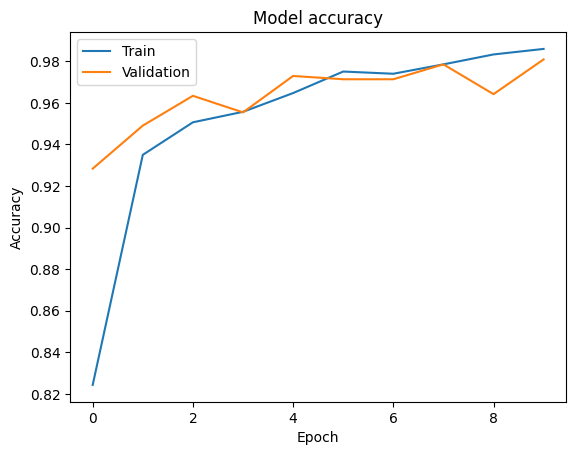

In [42]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

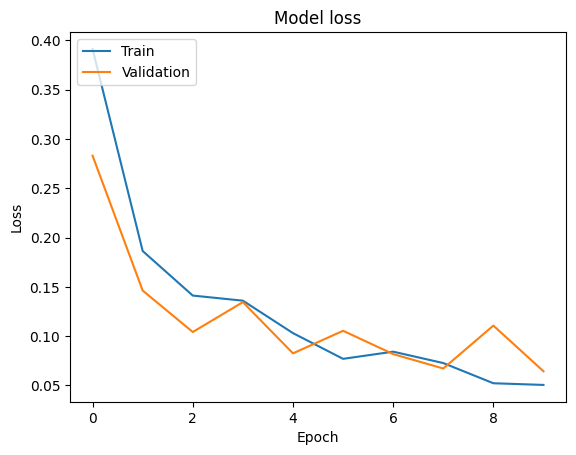

In [43]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Ploting the graph of accuracy and loss for the model with 3 droupout layers 

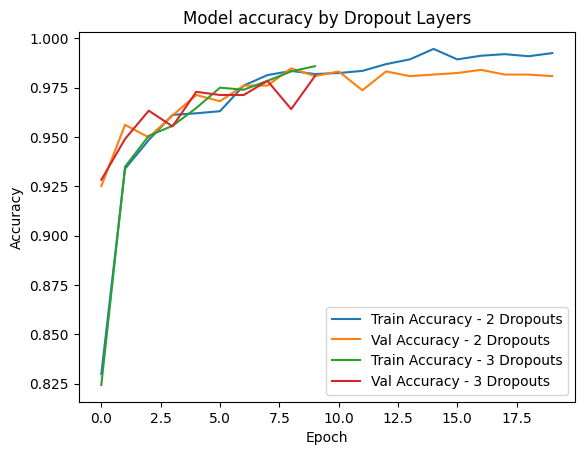

In [44]:
for layers, history in histories:
    plt.plot(history.history['accuracy'], label=f'Train Accuracy - {layers} Dropouts')
    plt.plot(history.history['val_accuracy'], label=f'Val Accuracy - {layers} Dropouts')

plt.title('Model accuracy by Dropout Layers')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

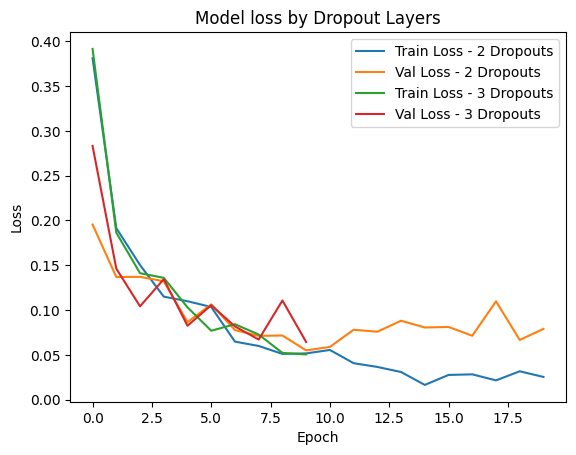

In [45]:
for layers, history in histories:
    plt.plot(history.history['loss'], label=f'Train Loss - {layers} Dropouts')
    plt.plot(history.history['val_loss'], label=f'Val Loss - {layers} Dropouts')

plt.title('Model loss by Dropout Layers')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


Tracking the learning process using tensorboard

Creating two functions

1)Preprocess function which reads an image, converts it to grayscale, resizes it to 100x100 pixels, normalizes pixel values, and adds a channel dimension for model compatibility. 

2)Prediction function is used to a trained model to predict tuberculosis based on the image, classifying it as positive if the prediction is above a threshold of 0.5.

In [46]:
def preprocess(path):
    img_arr = []
    image_path = path
    
    img = cv2.imread(str(image_path))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img,(100,100))
    img = img/255

    img_arr.append(img)
    img_arr = np.array(img_arr)
                 
    img_arr = np.expand_dims(img_arr,axis=-1) # adding a channel dimension
    
    return img_arr


def prediction(img,model):
    result = model.predict(img_arr)
    threshold = 0.5
    if result >= threshold:
        print("The patient has Tuberculosis")
    else:
        print("The patient does not have Tuberculosis")

Prediction wheather the patient have tuberculosis or not

Taking x-ray from the dataset we have and predicting


In [47]:
input_image=(r"C:\Users\nithi\OneDrive\Desktop\Deep Learning\TB_Chest_Radiography_Database\Normal\Normal-66.png")
img_arr = preprocess(input_image)

In [48]:
img_arr.shape

(1, 100, 100, 1)

In [49]:
prediction(img_arr,model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
The patient does not have Tuberculosis


In [50]:
input_image=(r"C:\Users\nithi\OneDrive\Desktop\Deep Learning\TB_Chest_Radiography_Database\Tuberculosis\Tuberculosis-28.png")
img_arr = preprocess(input_image)
prediction(img_arr,model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
The patient does not have Tuberculosis


In [51]:
y_pred = model.predict(X_test)
y_pred = (y_pred >= 0.5).astype(int)

40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 183ms/step


In [52]:
y_pred = np.reshape(y_pred,(y_pred.shape[0]))

In [53]:
y_pred

array([0, 1, 0, ..., 0, 1, 0])

A confusion matrix presents a table layout of the different outcomes of the prediction and results of a classification problem and helps visualize its outcomes.

In [54]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print(cm)

[[636  17]
 [ 85 518]]


ploting a table of all the predicted and actual values 

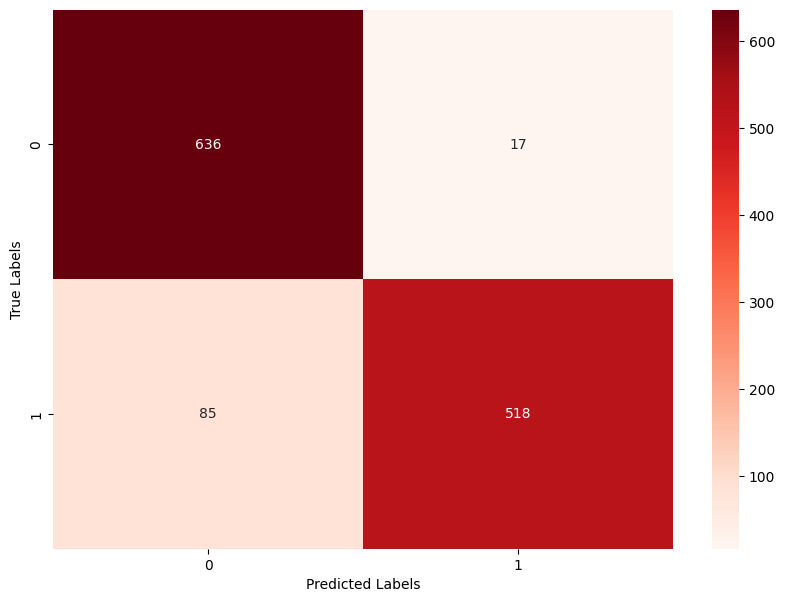

In [55]:
import seaborn as sns

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [56]:
from sklearn.metrics import *

Seeing the report of the model

In [57]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.93       653
           1       0.97      0.86      0.91       603

    accuracy                           0.92      1256
   macro avg       0.93      0.92      0.92      1256
weighted avg       0.92      0.92      0.92      1256



We have acheived a accuracy of 0.99 which means it is a successful model

In [58]:
num_ones = np.count_nonzero(y_train == 1)
num_zeroes = np.count_nonzero(y_train == 0)

In [59]:
num_ones,num_zeroes

(1891, 1877)

Here to see the TensorBoard just press the Launch TensorBoard Session it will open the tensorboard or else run the this line 
%tensorboard --logdir logs/fit in the command promnt it will open in the browser 

In [60]:
# Tensorboard Visualization
%tensorboard --logdir logs/fit

UsageError: Line magic function `%tensorboard` not found.


The Time Series typically displays metrics like accuracy and loss over training epochs, giving insight into how the model’s performance changes.

The Histograms shows distribution of histograms for model parameters at different layers or epochs. These histograms visualize how the values of biases change during training.

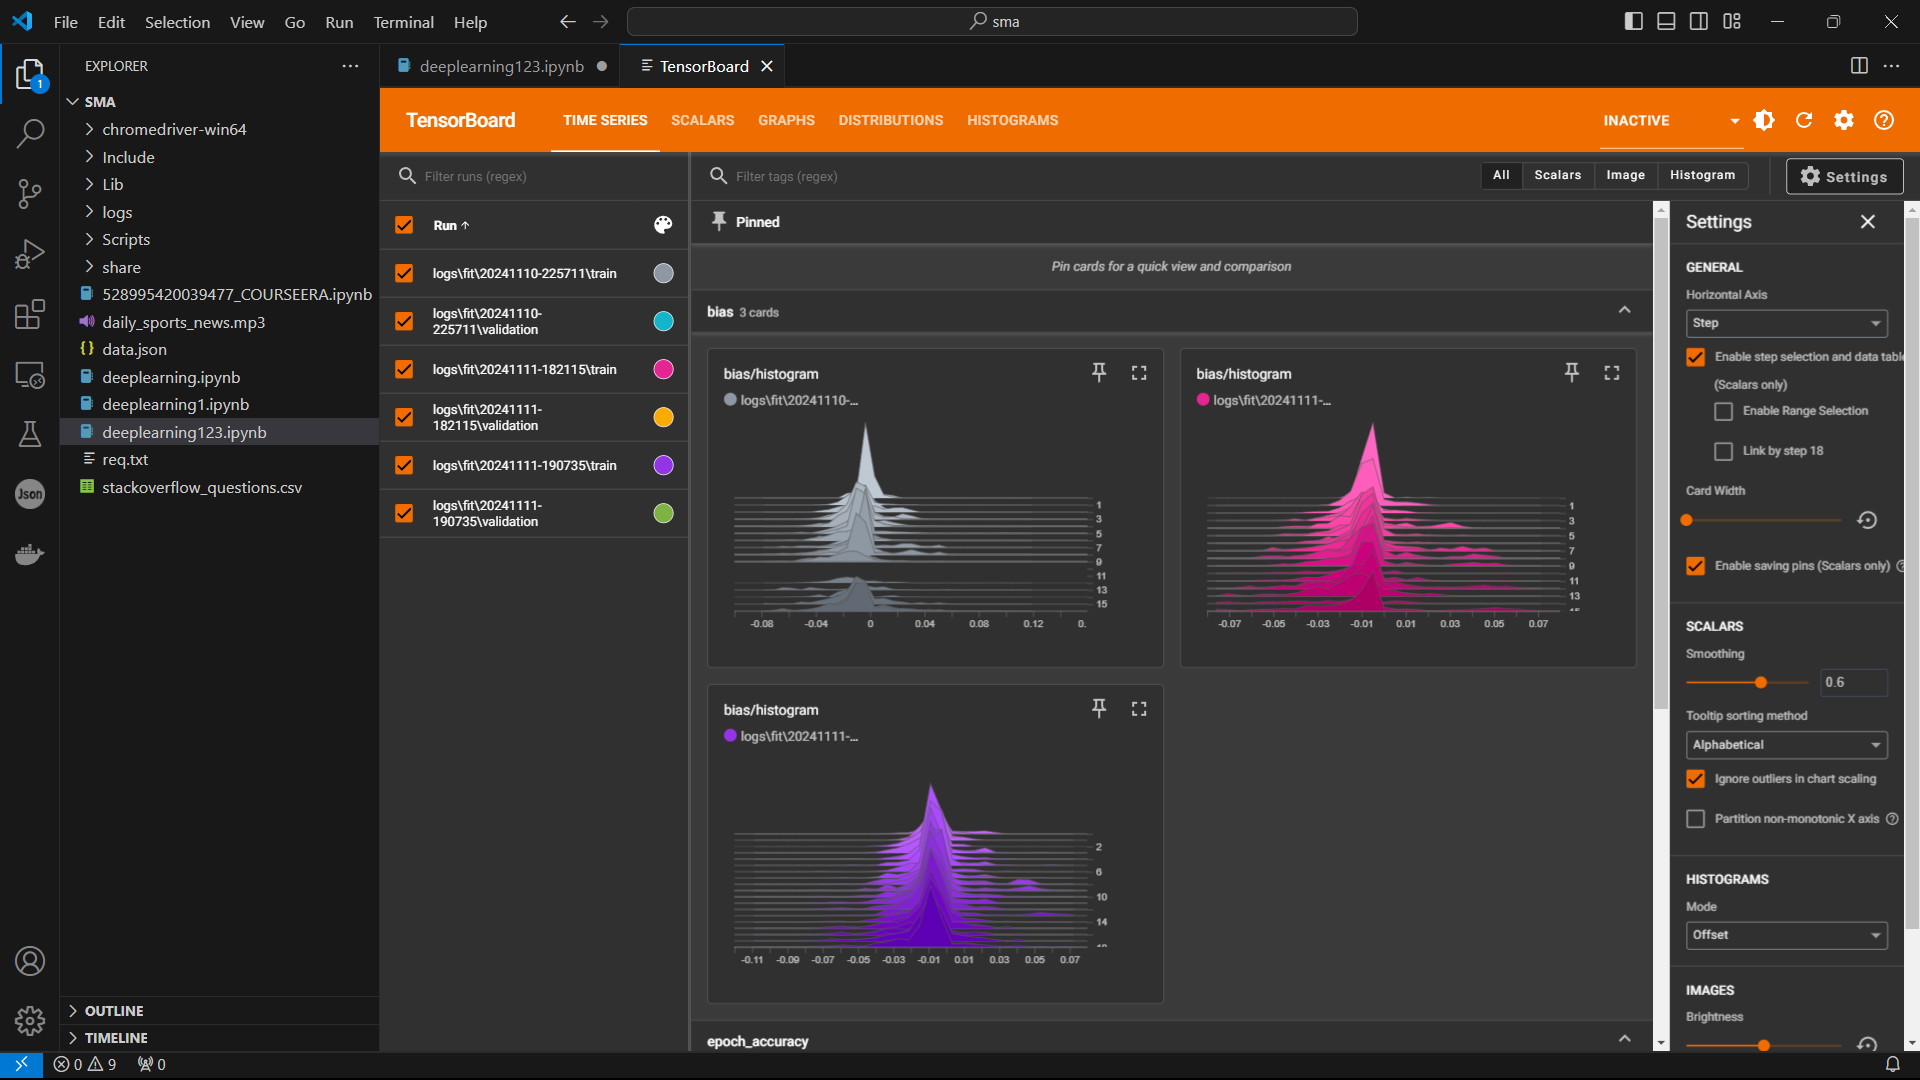

In [61]:
from IPython.display import Image, display

display(Image(filename="C:/Users/nithi/OneDrive/Pictures/Screenshots/Screenshot (70).png"))

The overlayed histograms show changes in distributions for the parameters as the model trains and the different colors distinguish between various runs.

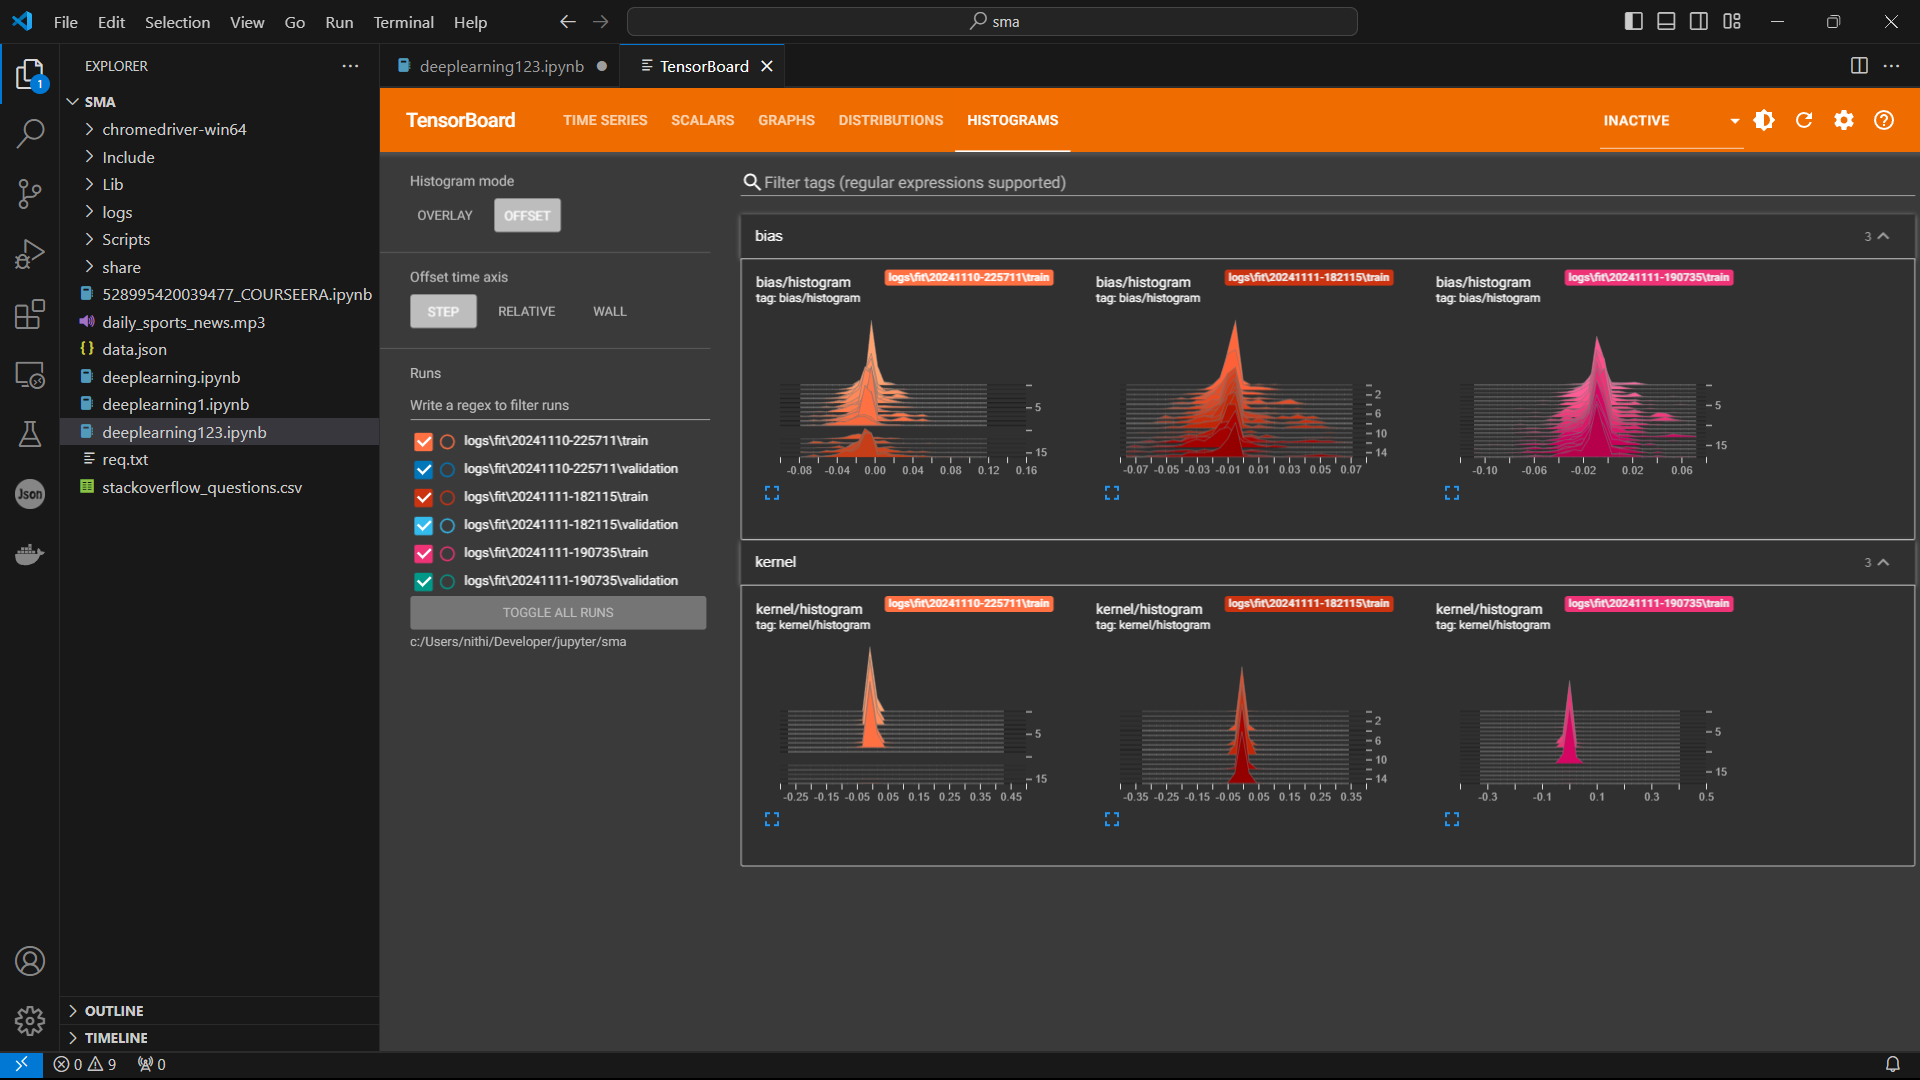

In [62]:
from IPython.display import Image, display

display(Image(filename="C:/Users/nithi/OneDrive/Pictures/Screenshots/Screenshot (71).png"))


The graphs reveal fluctuations in parameter values across epochs.

Distribution plots are essential for understanding how weights evolve, which can help detect issues like overfitting or underfitting.

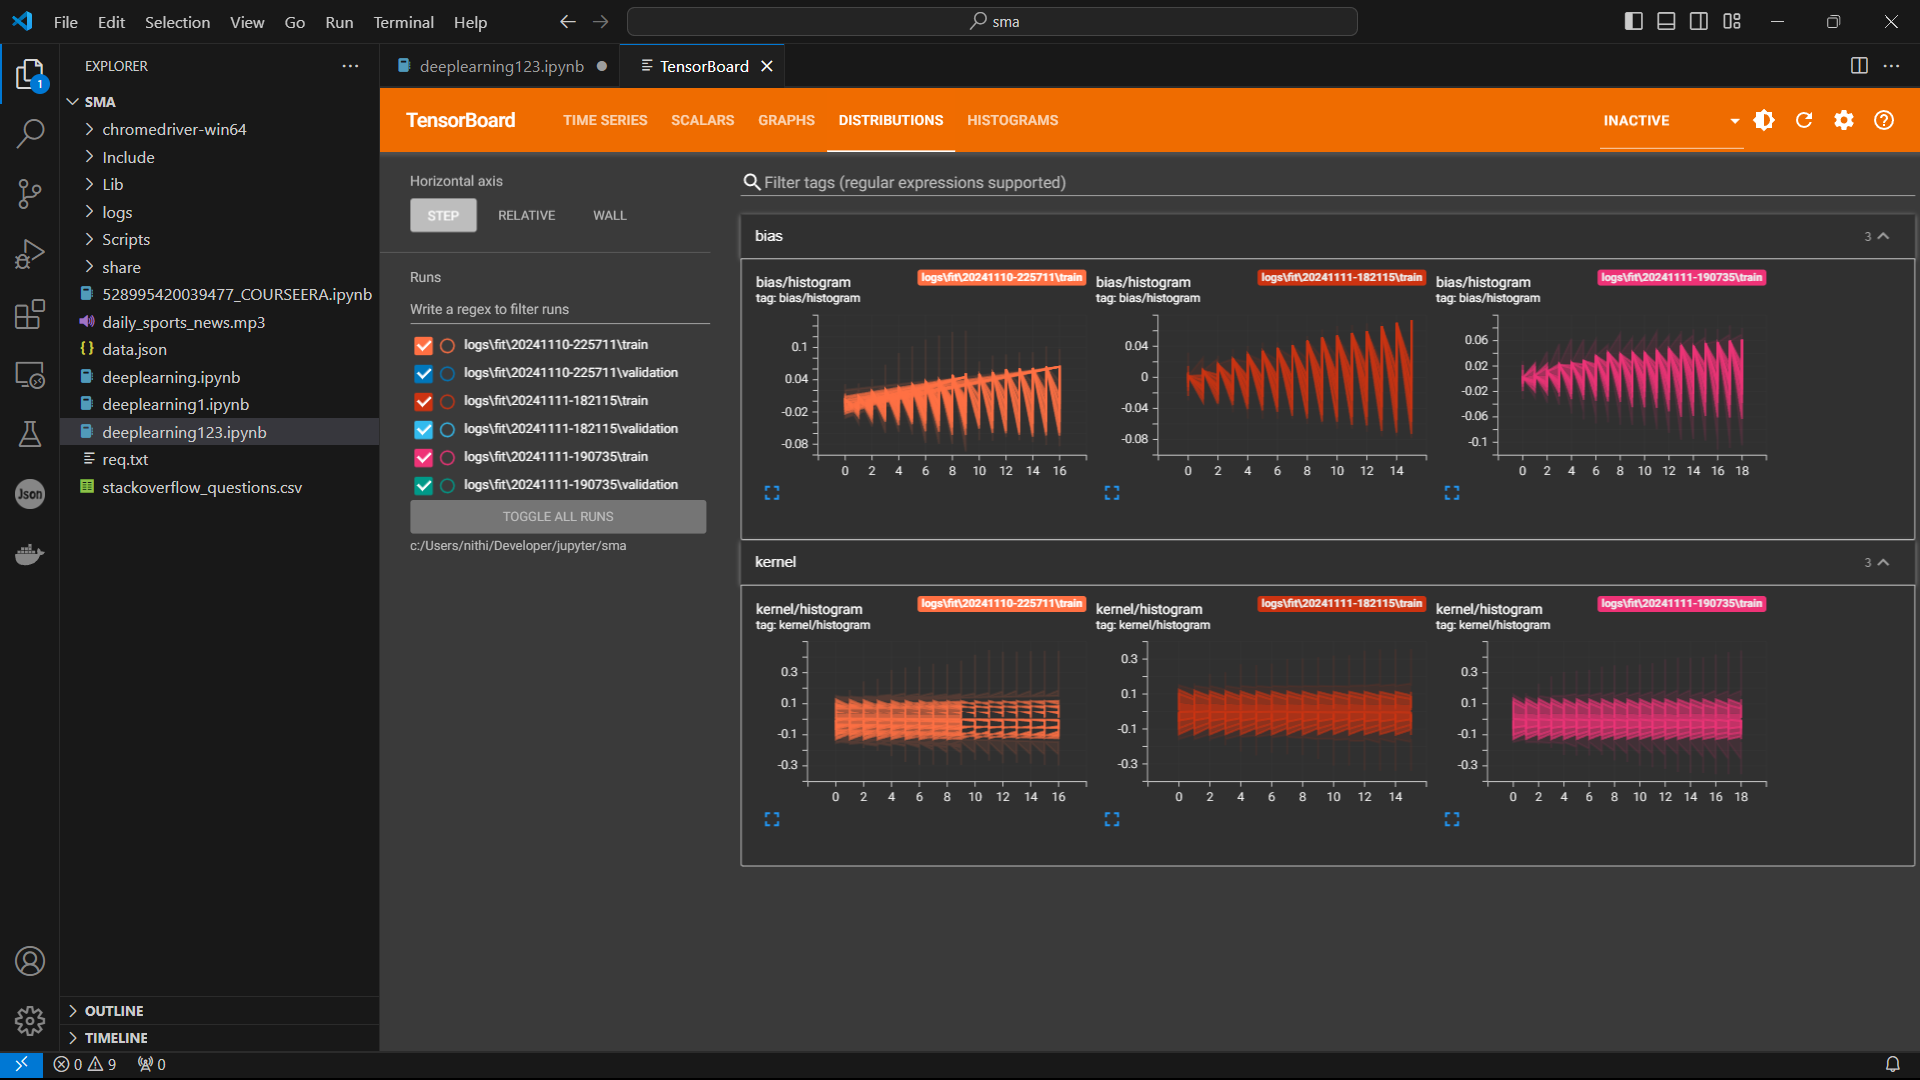

In [63]:
from IPython.display import Image, display

display(Image(filename=r"C:\Users\nithi\OneDrive\Pictures\Screenshots\Screenshot (72).png"))

These visualizations can help in assessing the effectiveness of the model in distinguishing between normal and tuberculosis X-rays.

# Task 7 – Conclusions and Future Work

# 1. Summarize and interpret the achieved results.

The model's accuracy metric, along with other metrics like precision, recall, and F1-score  gave a clearer picture of its classification quality. For tuberculosis detection it is crucial to indicates the model's ability to correctly identify true positive TB cases, essential in a healthcare context.

The training and validation accuracy are close across epochs, it indicates good generalization; however, if there is a large gap it might suggest overfitting which would mean the model learns the training data well but may not perform as effectively on new data. In this model we can see that clearly there is no overfitting so the model works well.

We also used early stopping mechanism where if there is noth new to learn for the model to stop and proceed for the next.

With the use of data augmentation, it generalizes well within the dataset used. As the model got the accuracy of 0.99 which means model where i used CNN model appears to have reasonable accuracy in classifying X-rays as TB or normal.

# 2. Recommend a course of action for the organization in your story based on the results of Task 6

Given its initial performance, the organization can use this model in a limited diagnostic setting as a screening tool. Implementing this model in environments where TB diagnosis resources are limited, it could help them to fin the TB patient easily.

The organization can also use this  mode in rural clinics, which could serve as a pre-screening tool and help them.

To ensure patient safety and minimize diagnostic errors, the organization could start with a hybrid approach where the model assists but does not replace human judgment.

# 3. Reflect on limitations and possible pitfalls of using these results.

Poor-quality or atypical X-rays may reduce model performance, impacting its reliability in real-world clinical scenarios.

Real-world chest X-rays may have various abnormalities that resemble TB but are not TB, such as pneumonia or lung cancer in that case the model may go wrong.

Without diverse data, the model may struggle with unseen cases and may predict wrong case which would be problamatic in clinical applications.

# 4. Propose three ideas for future work (a short sketch or enumeration of ideas is sufficient, nofurther experiments). The ideas should not be too general (e.g., “try further algorithms”) but be specific to the project (e.g., “try Algorithm X, as because of Property Y, it might work specifically well on this dataset”).

Including diverse chest X-ray images from various demographics, geographies, and devices will improve robustness and also adding other lung diseases as additional classes like pneumonia, COPD can enhance its applicability by enabling it to distinguish between multiple lung conditions, not just TB.

Pre-trained models such as VGG16, ResNet, or DenseNet have been trained on large image datasets and capture complex feature hierarchies. By fine-tuning these models on TB data, then it could benefit from their strong feature extraction capabilities, potentially boosting accuracy with minimal additional data.

Integrating explainable AI techniques such as Grad-CAM (Gradient-weighted Class Activation Mapping) can highlight specific areas in the X-ray that the model uses to make decisions. This is valuable in healthcare because it adds transparency to model predictions, potentially increasing trust among healthcare professionals.





# 5. Critically discuss the employed methodology (your choices as well as the choices given in these tasks). What could or even should have been done differently?

The choice of model is the CNN architecture which is suitable for image classification tasks, but using pre-trained models with transfer learning could significantly improve feature representation and performance.

Accuracy alone may not be sufficient including sensitivity, specificity would provide a more comprehensive view of performance, particularly in medical applications.

Employing cross-validation and testing on an external dataset would better assess the model's generalizability.


# 6. Critically reflect the original task you pitched. In hindsight, were the goals realistic? What could have been changed at the time of the pitch?

Using X-rays to detect TB is realistic, but after the pitch i think adding other lung diseases could increase the diagnostic utility. A multi-class model might better meet the needs of real clinical environments.

A larger, more diverse dataset would enhance the model’s ability to generalize to varied real-world cases and starting with a focus on metrics like sensitivity could guide model optimization towards healthcare goals, as high sensitivity is crucial for early and accurate TB detection.

<div class="alert alert-block alert-warning">
<b>End of notebook</b> 
</div